<a href="https://colab.research.google.com/github/Jazzygithub/AIDI-1002/blob/main/Algo_Car_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Statement**
The aim of this project is to build a Car Price Prediction model which will accept car features such as: Car Brand, Year, Fuel type, Transmission type, Mileage, Present Price, last sold price, etc.  

Using these features within our datasets, we will train our machine learning algorithm such as to find patterns in the dataset, and see the relationship between the different features, with the end goal of having a properly trained, accurate model that effectively predicts the appropriate selling price of a car based off new data that is fed into the model.


Task: Data Aquisition and Understanding - SOW-V2

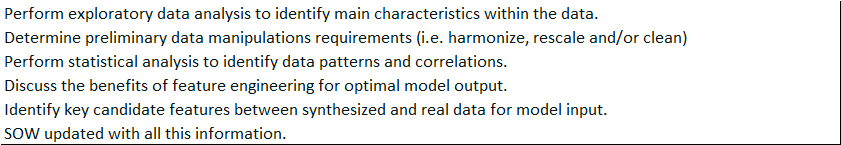

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Sources
Data will be sourced from open sources on the Internet.  
https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe/data

Step 1: Importing data using the pandas library and understand the structure of the data

In [ ]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.shape

(205, 26)

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Step 2: Cleaning the data and dropping columns 

In [ ]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Clean the data, as we can see some car names are typed wrong.

In [ ]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Step 3: Visualize the Data to see feature relationships.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


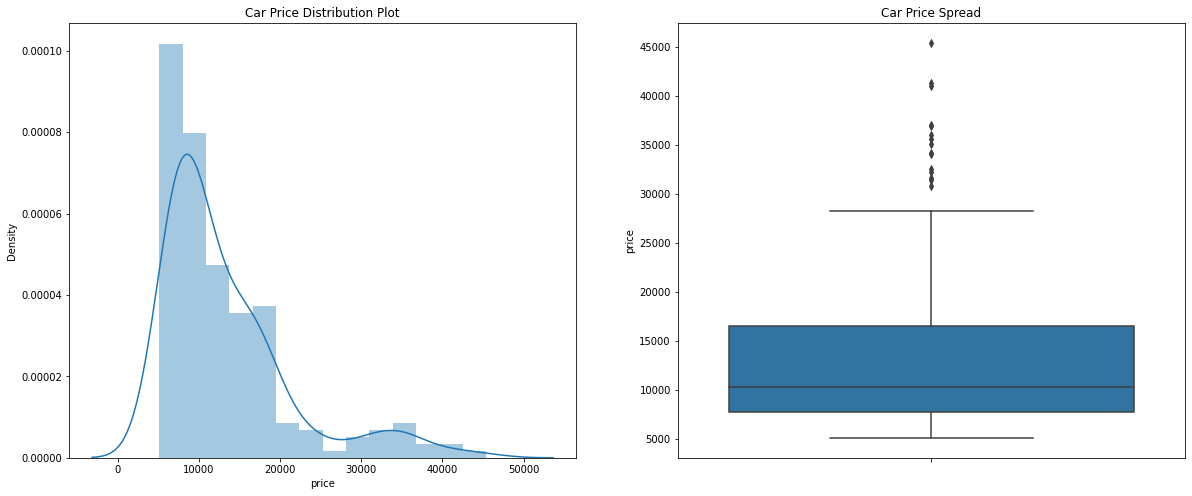

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [ ]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


**EDA Results:**
The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

**Categorical Data Visualization**

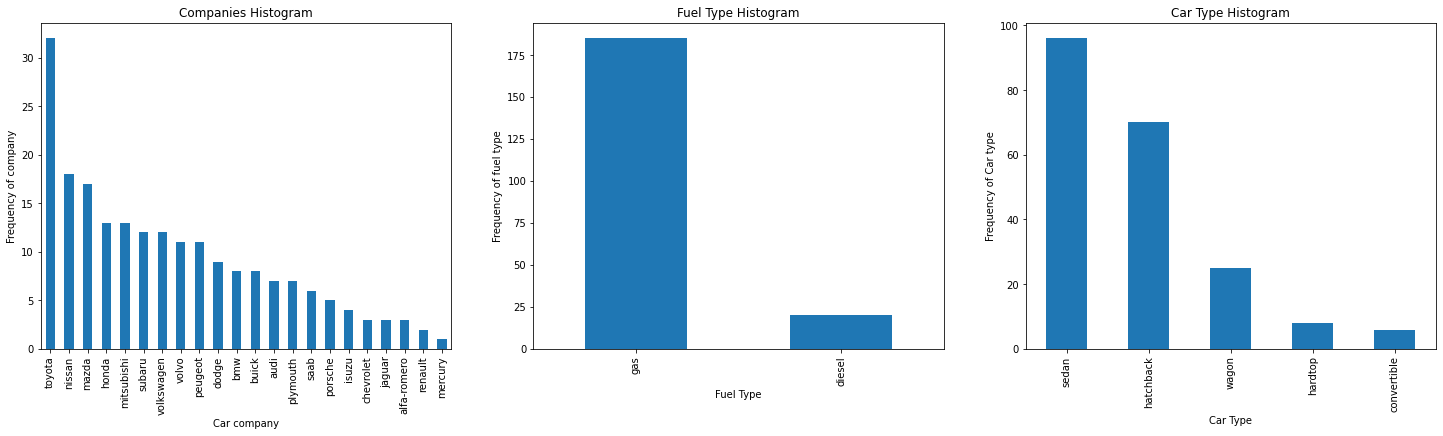

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind ='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind ='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind ='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

Here we have visualized the frequencies of what we deem to be important features in determining the price of a car. The charts display the frequency from the highest on the left to the lowest on the right. We are able to see that the most common car company is Toyota, the most common car fuel type is gas and the most common car type is sedan.

**Additional Visualization of Data**

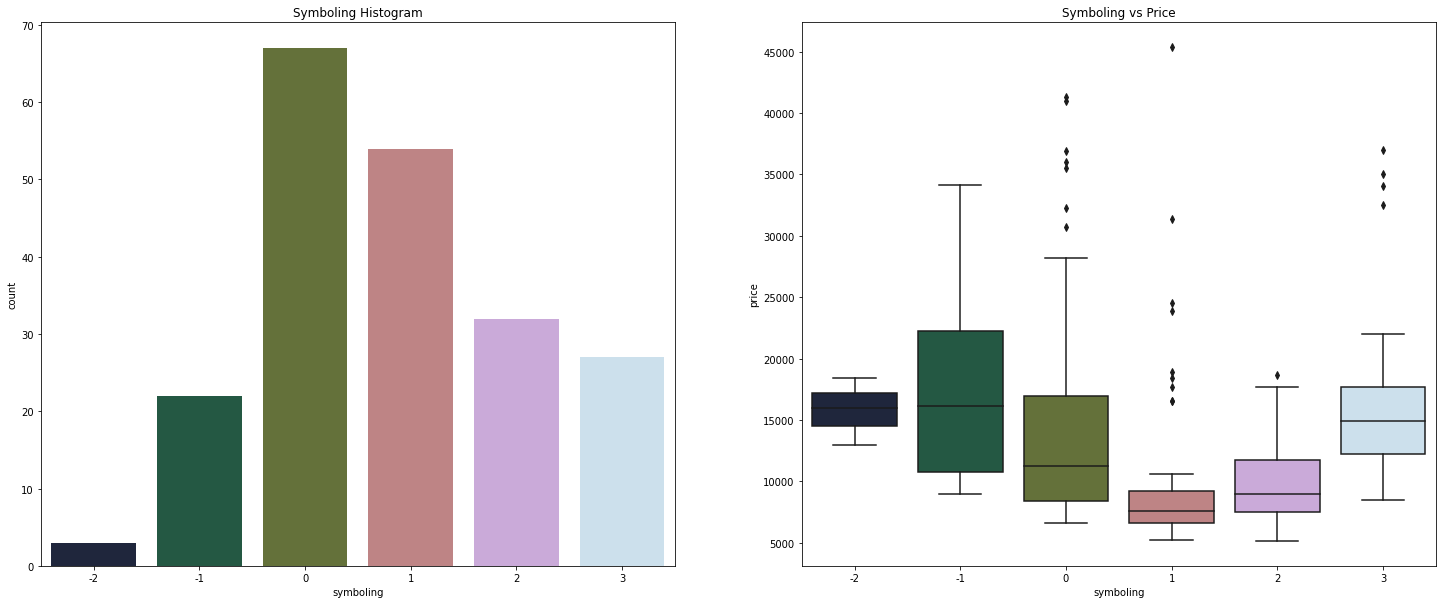

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(x=cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

Inference :
It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

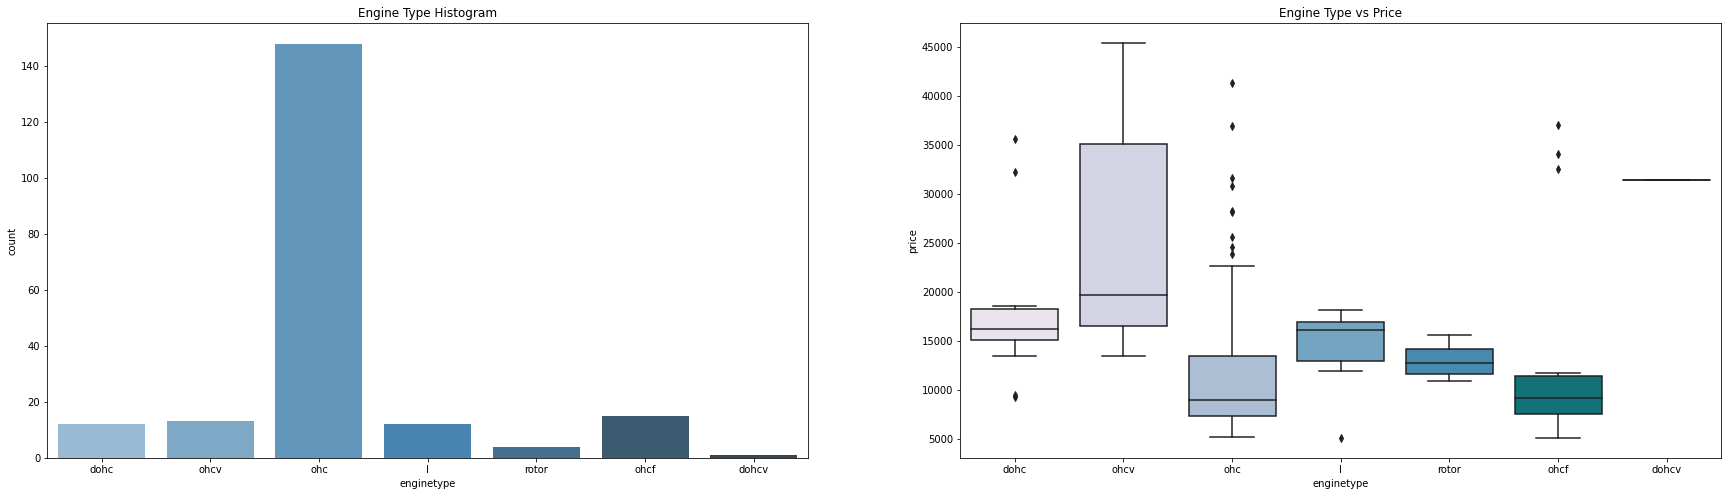

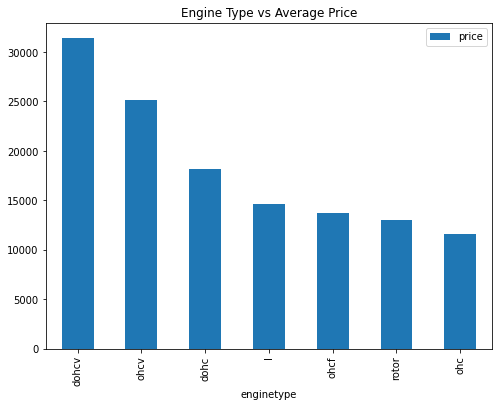

In [ ]:
plt.figure(figsize=(30,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(x=cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

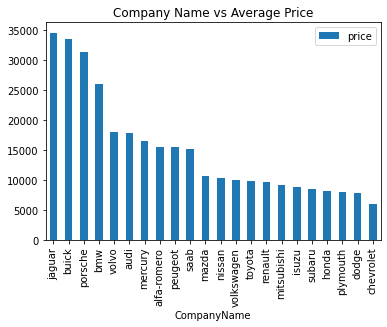

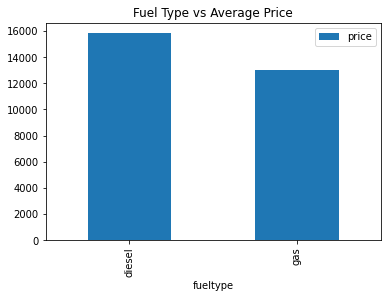

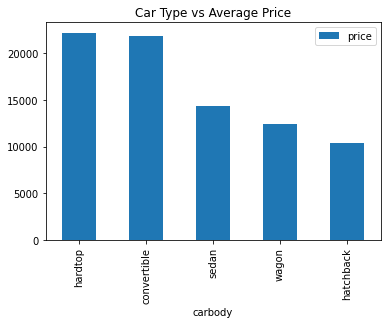

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Plotting different car features against the average car price and arranging in descending price order

Inference :
Jaguar and Buick seem to have highest average price.
diesel has higher average price than gas.
hardtop and convertible have higher average price.

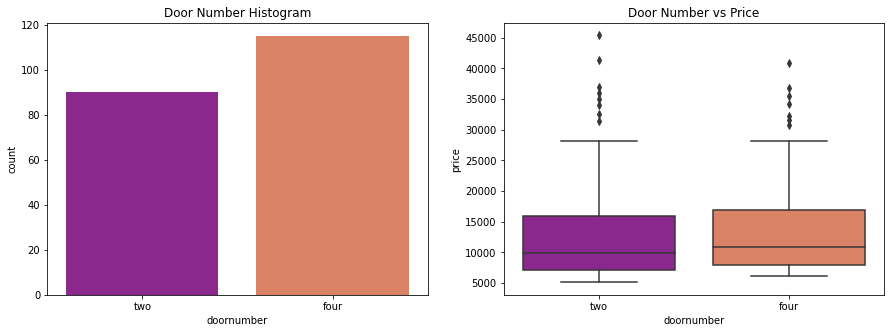

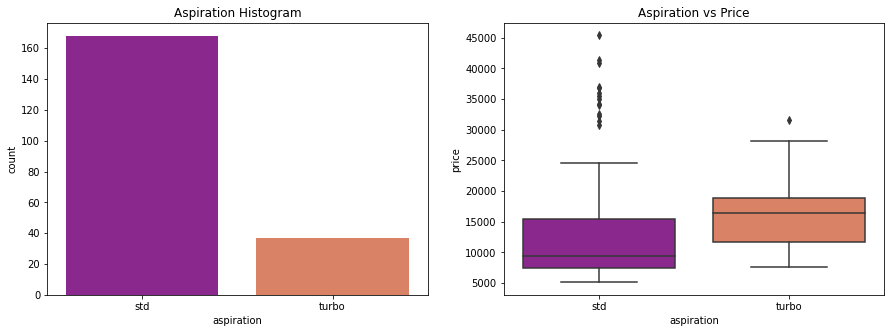

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(x=cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(x=cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


Visualization Results: Door number variable does not affect the price much. There is no significant difference between the categories.
It seems aspiration with turbo has a higher price range than the std(though it has some high values outside the whiskers).

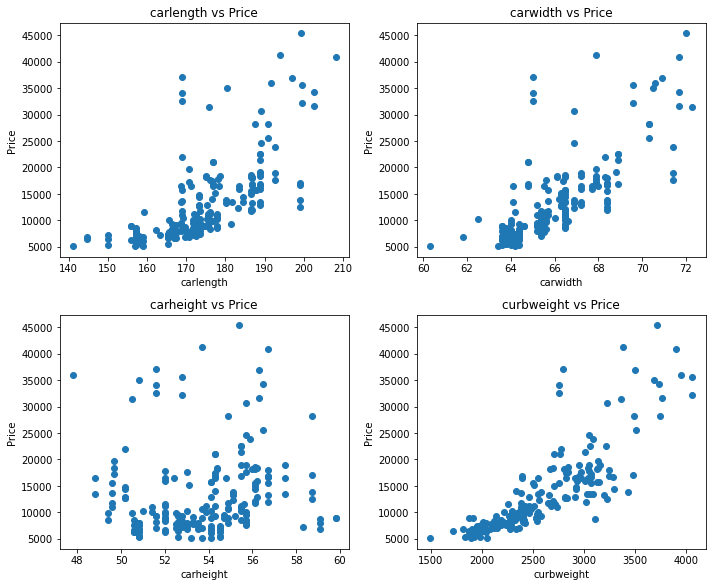

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

Inference :
carwidth, carlength and curbweight has a somewhat positive correlation with price.
There is no obvious relationship between carheight and price.

So generally it is safe to say the bigger the car, the more expensive it is, exc;uding height of course which makes logical sense as a lot of high-end sports cars are quite low-built.

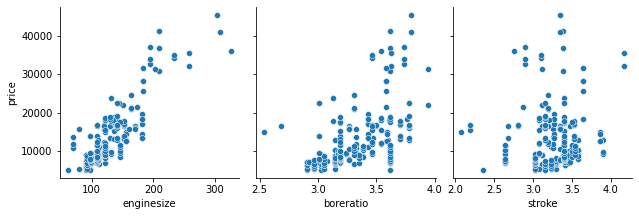

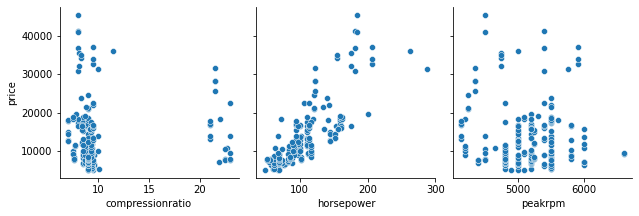

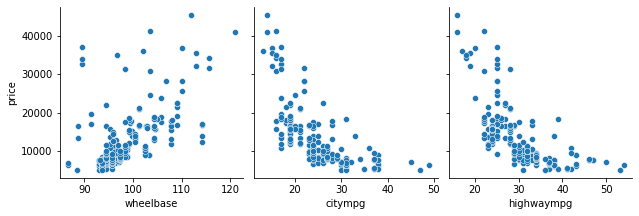

In [ ]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=3, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

enginesize, boreratio, horsepower, wheelbase - all show a strong positive correlation with the pricing of the car
citympg, highwaympg - seem to have a significant negative correlation with car pricing.

In [ ]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

In [ ]:
#Fuel economy - Implementing a new more practical feature
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

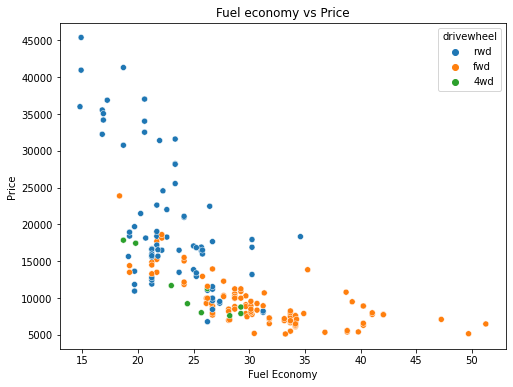

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

fueleconomy has a significant negative correlation. This makes logical sense, in that, the higher the efficiency of fuel consumption the higher the car will be priced and less efficient cars are lower priced. Cars that are rear wheel drives can be seen to be the most efficient and on the other hand, forward wheel drive cars are the least efficient.

**Feature Engineering for Optimal Model Output**

**Selection of optimal features that will be most appropriate to be used as feature columns in building the model**

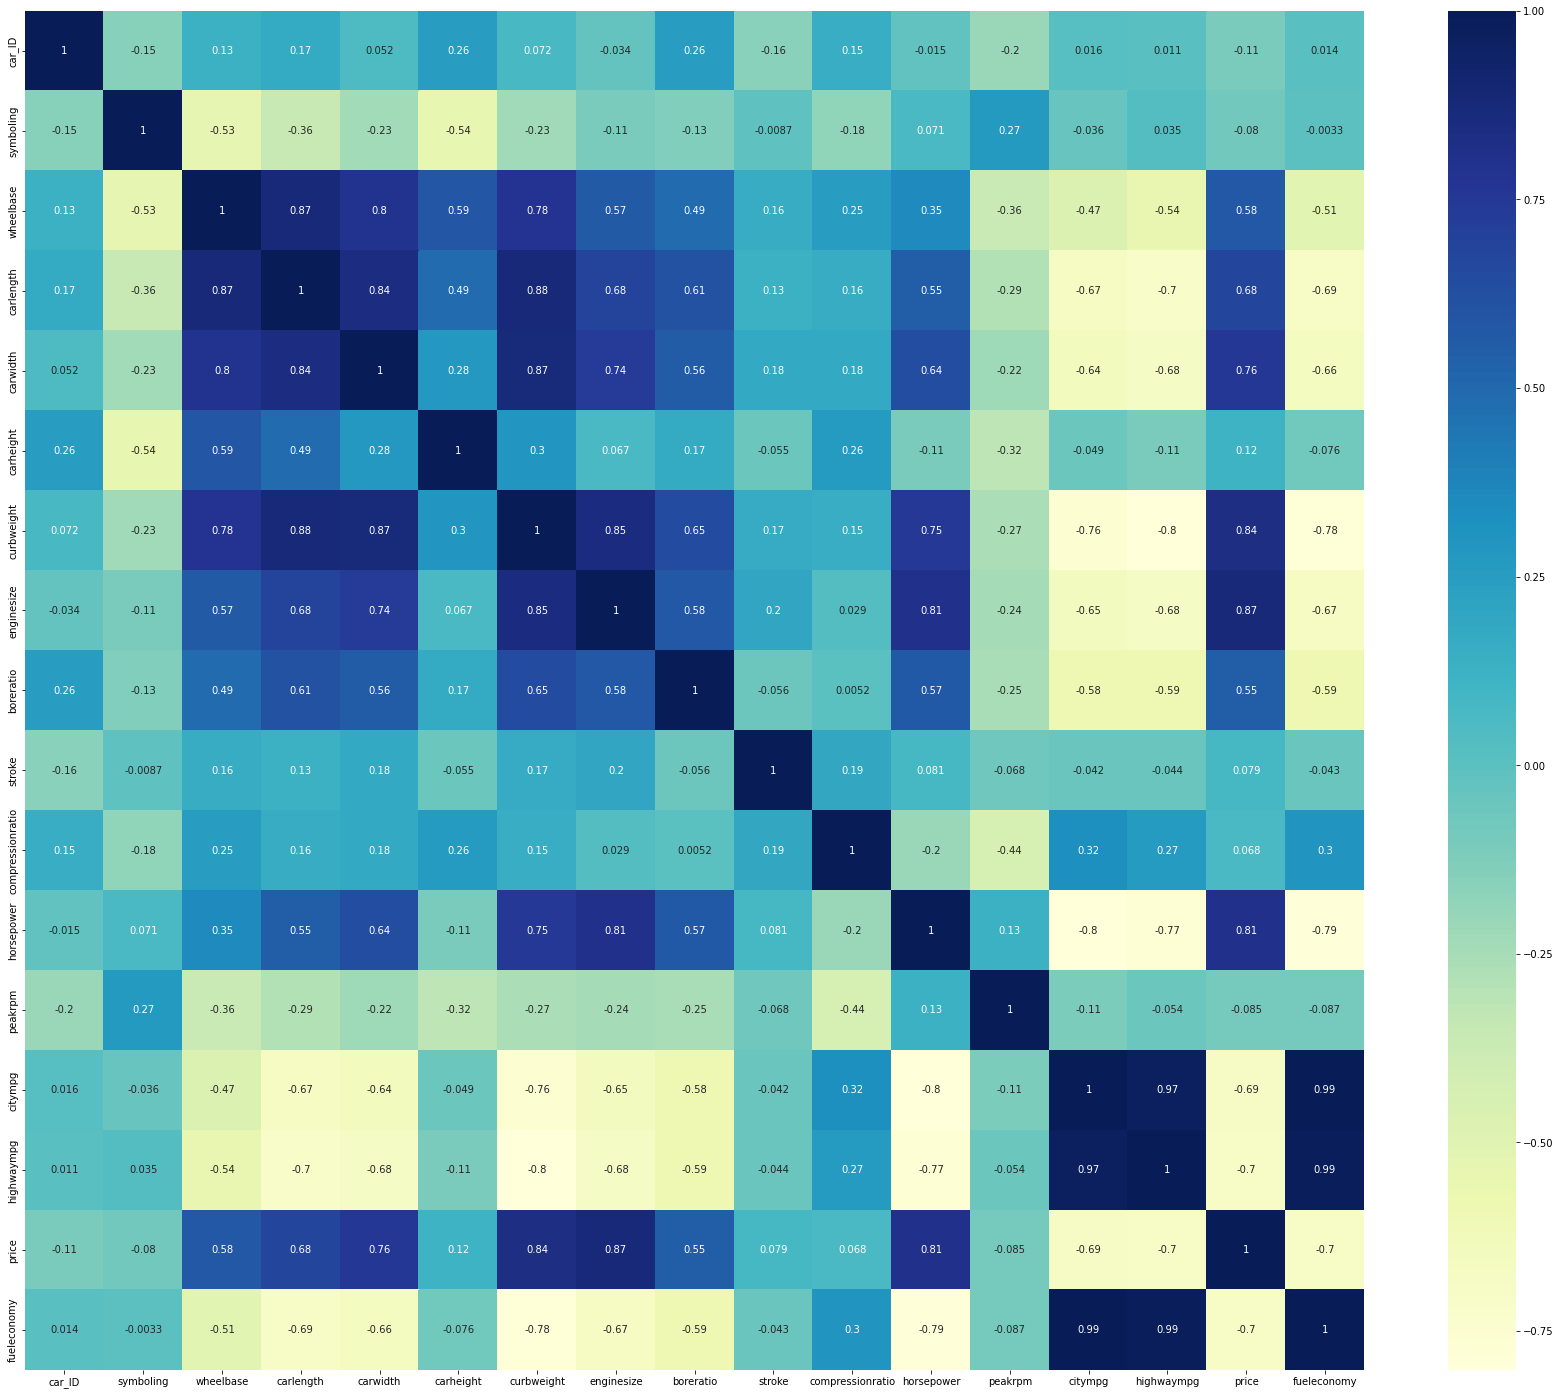

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(cars.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [ ]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4


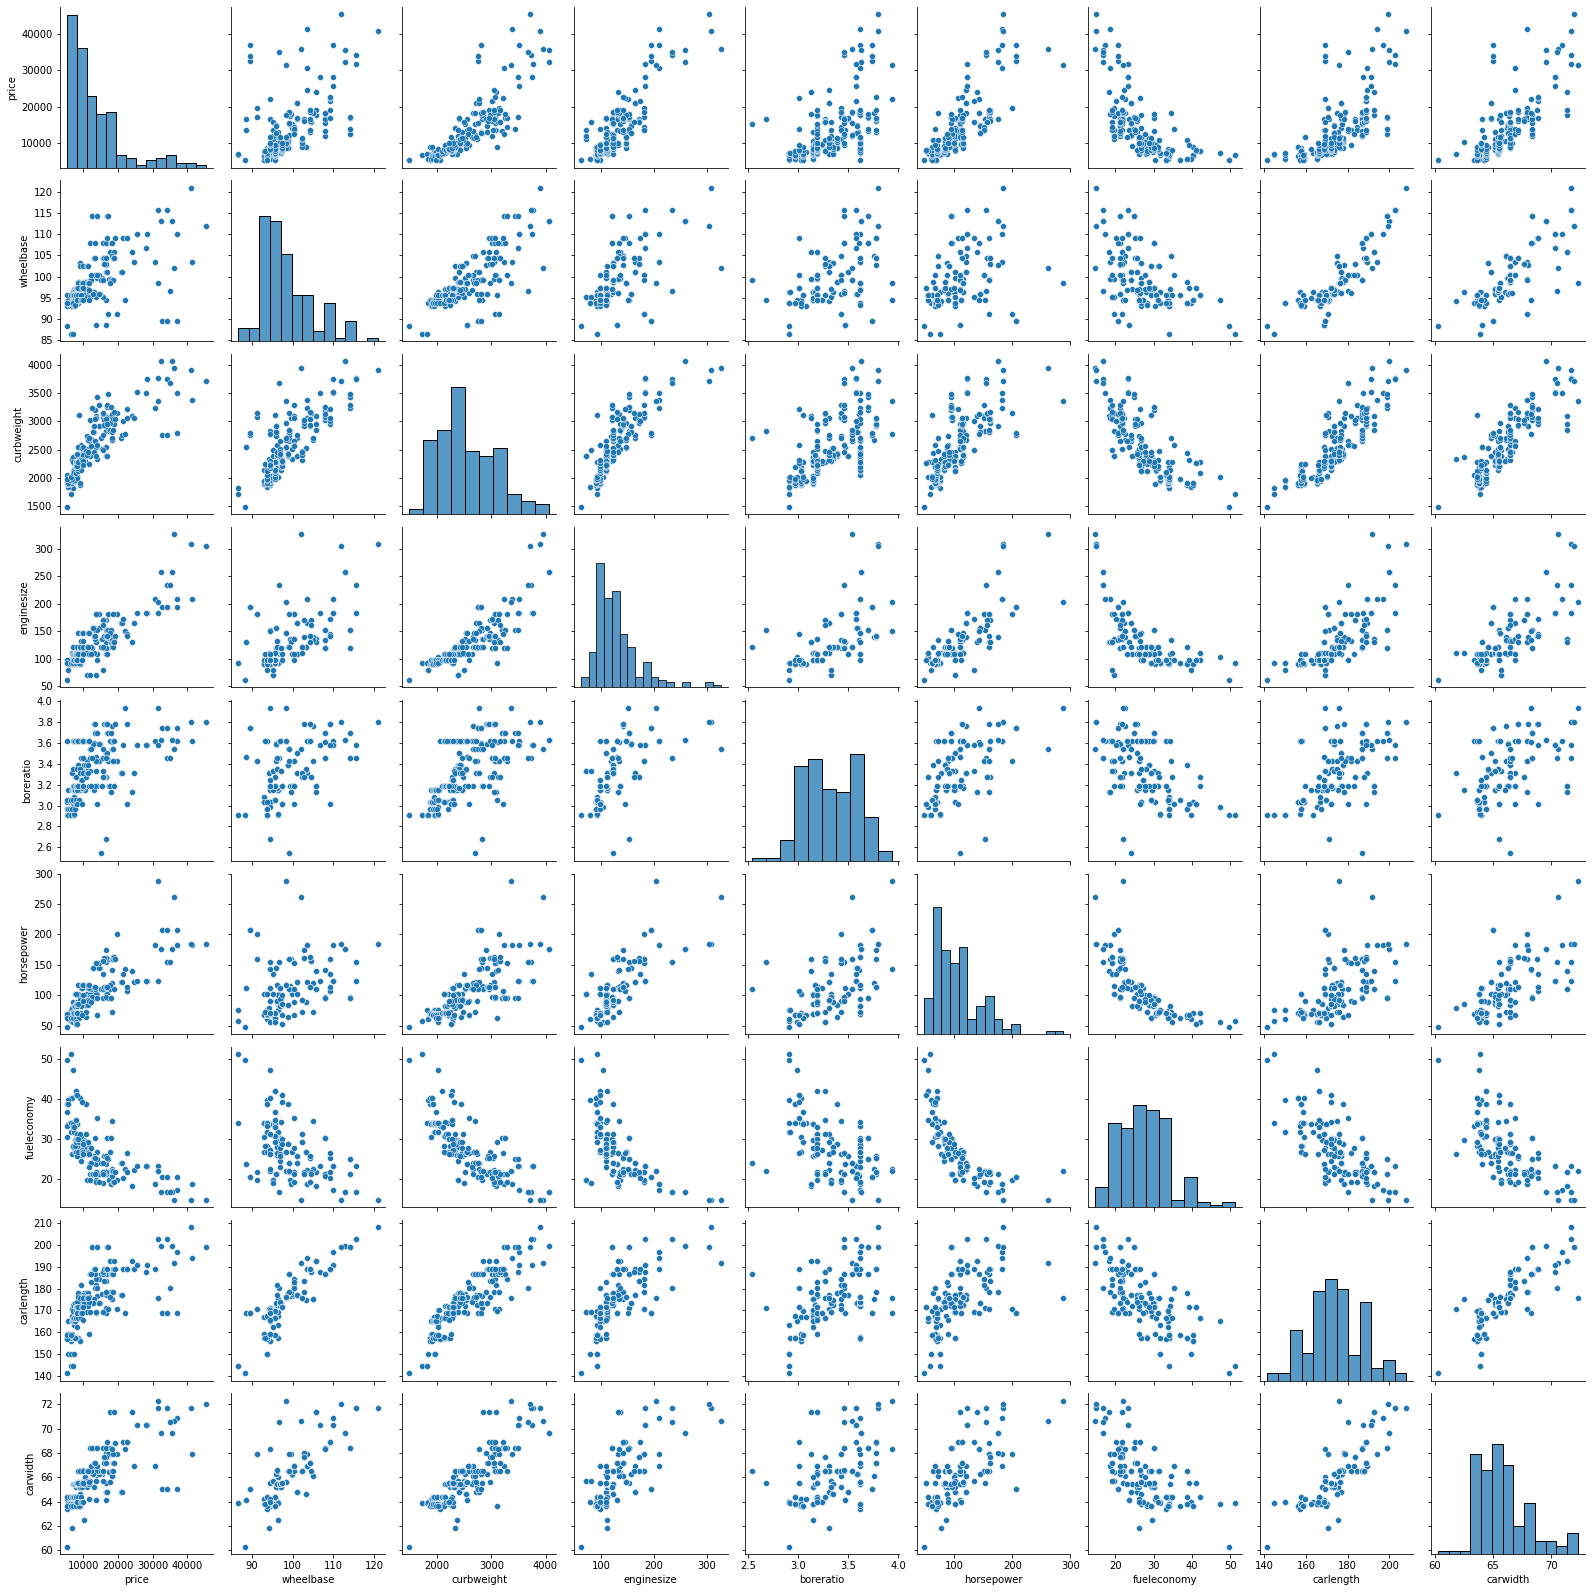

In [ ]:
sns.pairplot(cars_lr)
plt.show()

Inference: As can be seen from the above pairplots, all of the features selected have a strong correlation with the pricing of the vehicle, some positive and some negative. These features will make a good selection for accurately training our model, as the features will make provide good insight into the relationships they share with the pricing, which will be good for a linear regression analysis.

**Final data processing**

In [ ]:
finalcars_df = pd.get_dummies(cars_lr, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'])
finalcars_df

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,22.15,171.2,65.5,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,26.70,176.6,66.2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,19.80,176.6,66.4,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,2952,141,3.78,114,25.25,188.8,68.9,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,3049,141,3.78,160,21.70,188.8,68.8,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,3012,173,3.58,134,20.25,188.8,68.9,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
203,22470.0,109.1,3217,145,3.01,106,26.45,188.8,68.9,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


Here we're encoding the string values and making it into several columns of binary format, this would allow the data to be accessible for the model we would be using. All columns are now in numerical format and we can now proceed to modelling.

In [ ]:
#Processing
#Transforming and scaling all non-binary entries to a range of (0,1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'carlength', 'carwidth']
finalcars_df[num_vars] = scaler.fit_transform(finalcars_df[num_vars])
finalcars_df

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,0.058309,0.411171,0.260377,0.664286,0.262500,0.244170,0.413433,0.316667,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,16500.0,0.058309,0.411171,0.260377,0.664286,0.262500,0.244170,0.413433,0.316667,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,16500.0,0.230321,0.517843,0.343396,0.100000,0.441667,0.201646,0.449254,0.433333,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,13950.0,0.384840,0.329325,0.181132,0.464286,0.225000,0.326475,0.529851,0.491667,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,17450.0,0.373178,0.518231,0.283019,0.464286,0.279167,0.137174,0.529851,0.508333,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,0.655977,0.567882,0.301887,0.885714,0.275000,0.286694,0.711940,0.716667,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
201,19045.0,0.655977,0.605508,0.301887,0.885714,0.466667,0.189300,0.711940,0.708333,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
202,21485.0,0.655977,0.591156,0.422642,0.742857,0.358333,0.149520,0.711940,0.716667,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
203,22470.0,0.655977,0.670675,0.316981,0.335714,0.241667,0.319616,0.711940,0.716667,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


**Train/Test Split and Modelling**

In [ ]:
X = finalcars_df.drop(columns='price')
y = finalcars_df.price
print(X)
print(y)

     wheelbase  curbweight  ...  cylindernumber_twelve  cylindernumber_two
0     0.058309    0.411171  ...                      0                   0
1     0.058309    0.411171  ...                      0                   0
2     0.230321    0.517843  ...                      0                   0
3     0.384840    0.329325  ...                      0                   0
4     0.373178    0.518231  ...                      0                   0
..         ...         ...  ...                    ...                 ...
200   0.655977    0.567882  ...                      0                   0
201   0.655977    0.605508  ...                      0                   0
202   0.655977    0.591156  ...                      0                   0
203   0.655977    0.670675  ...                      0                   0
204   0.655977    0.610551  ...                      0                   0

[205 rows x 34 columns]
0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

In [ ]:
models = []

models.append(('Linear', LinearRegression()))
models.append(('Lasso',  Lasso()))
models.append(('Ridge',  Ridge(alpha = 0.1)))

In [ ]:
names = []
Mean_Absolute_Error = []
Root_Mean_Squared_Error = []
R_squared = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    Mean_Absolute_Error.append(mean_absolute_error(y_test_cross, y_pred_cross))
    Root_Mean_Squared_Error.append(np.sqrt(mean_squared_error(y_test_cross, y_pred_cross)))
    R_squared.append(r2_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Mean Absolute Error': Mean_Absolute_Error, 'Root Mean Squared Error': Root_Mean_Squared_Error, 'R-squared': R_squared})
print(tr_split)

     Name  Mean Absolute Error  Root Mean Squared Error  R-squared
0  Linear          2358.108481              3772.016053   0.809193
1   Lasso          2346.509050              3735.822970   0.812837
2   Ridge          2321.067229              3585.511989   0.827595


**Prototyping**

In [ ]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state = 0)
ridge = Ridge(alpha = 1, fit_intercept=False, solver='lsqr')
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', rmse)
print('R-squared (R2):', r2)

Mean Absolute Error: 2247.223844944036
Root Mean Squared Error: 3206.2977804986817
R-squared (R2): 0.8443253360785985


In [ ]:
y_pred2 = ridge.predict(pd.DataFrame({'wheelbase':	0.058309, 'curbweight':	0.411171, 
                                      'enginesize':	0.260377,	'boreratio':	0.664286,	
                                      'horsepower':	0.262500,	'fueleconomy': 0.244170, 
                                      'carlength':	0.413433, 'carwidth':	0.316667,	
                                      'fueltype_diesel': 0,	'fueltype_gas': 1,	
                                      'aspiration_std': 1,	'aspiration_turbo': 0,	
                                      'carbody_convertible':	1, 'carbody_hardtop':	0, 
                                      'carbody_hatchback':	0, 'carbody_sedan': 0,	'carbody_wagon':	0, 
                                      'drivewheel_4wd': 0,	'drivewheel_fwd': 0,	'drivewheel_rwd': 1,	
                                      'enginetype_dohc': 1,	'enginetype_dohcv': 0,	'enginetype_l': 0,	
                                      'enginetype_ohc': 0,	'enginetype_ohcf':	0, 'enginetype_ohcv': 0,	
                                      'enginetype_rotor': 0,	'cylindernumber_eight': 0,	
                                      'cylindernumber_five':	0, 'cylindernumber_four':	1, 
                                      'cylindernumber_six': 0,	'cylindernumber_three': 0,	
                                      'cylindernumber_twelve':	0, 'cylindernumber_two': 0}, index=[0]))
y_pred2.astype(int)

array([14873])